In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import numpy as np

import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.minor.width'] = 0.5

In [2]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [3]:
url_rmm  = "rmm.74toRealtime.txt"    #get the data


In [4]:
rmm_csv = pd.read_csv(url_rmm,                        
                      sep       = "\s+",           #string separator
                      skiprows  = 1,               #skip the first row (it's only comments about the data, we don't need that)
                     )

In [5]:
rmm_csv

,"year,","month,","day,","RMM1,","RMM2,","phase,",amplitude.,Missing,Value=,1.E36,or,999
0,1974,6,1,1.634470,1.203040,5,2.029480,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
1,1974,6,2,1.602890,1.015120,5,1.897290,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
2,1974,6,3,1.516250,1.085510,5,1.864760,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
3,1974,6,4,1.509810,1.035730,5,1.830920,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
4,1974,6,5,1.559060,1.305180,5,2.033260,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18043,2023,10,25,-0.759337,1.216706,7,1.434212,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
18044,2023,10,26,-0.793645,1.177280,7,1.419810,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
18045,2023,10,27,-0.882120,0.989530,7,1.325634,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
18046,2023,10,28,-0.874455,0.638592,8,1.082807,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN


Cleaning up the header a little.

In [6]:
rmm_csv = rmm_csv.rename(columns={'year,' : 'year', 
                                  'month,': 'month',
                                  'day,'  : 'day',
                                  'RMM1,' : 'RMM1',
                                  'RMM2,' : 'RMM2',
                                  'phase,': 'phase',
                                  'amplitude.' : 'amplitude',
                                 }
                        )

rmm_csv = rmm_csv[["year","month","day", "RMM1", "RMM2", "amplitude"]]

rmm_csv = rmm_csv.loc[(rmm_csv["year"]>=1981) & (rmm_csv["year"]<=2018)]

Now, we split the data into two seasons: extended winter (NDJFMA) or extended summer (MJJASO).

In [7]:
rmm_season = rmm_csv.copy()   #copy the rmm data

season="NDJFMA"

if season == "NDJFMA":
    rmm_season.loc[(rmm_season["month"] >= 11) & (rmm_season["month"] <= 4)]
elif season == "MJJASO":
    rmm_season.loc[(rmm_season["month"] >= 5) & (rmm_season["month"] <= 10)]
# elif season == "DJF":
#     rmm_season.loc[(rmm__season["month"] >= 12) & (rmm_season["month"] <= 2)]
# elif season == "MAM":
#     rmm_season.loc[(rmm_season["month"] >= 3) & (rmm_season["month"] <= 5)]
# elif season == "JJA":
#     rmm_season.loc[(rmm_season["month"] >= 6) & (rmm_season["month"] <= 8)]
# elif season == "SON":
#     rmm_season.loc[(rmm_season["month"] >= 9) & (rmm_season["month"] <= 11)]
    
    

In [8]:
rmm_season

,year,month,day,RMM1,RMM2,amplitude
2406,1981,1,1,-0.342760,-0.737290,0.813072
2407,1981,1,2,-0.067393,-0.850890,0.853555
2408,1981,1,3,0.229987,-0.412600,0.472373
2409,1981,1,4,0.243862,0.019839,0.244668
2410,1981,1,5,0.436574,0.416489,0.603374
...,...,...,...,...,...,...
16280,2018,12,27,2.854728,1.061975,3.045860
16281,2018,12,28,2.554292,1.038218,2.757228
16282,2018,12,29,2.225662,1.079722,2.473736
16283,2018,12,30,1.976675,1.320823,2.377355


In [9]:
yyyymmdd  = rmm_season["year"].astype(str) + "-" +\
            rmm_season["month"].astype(str).str.zfill(2) + "-" +\
            rmm_season["day"].astype(str).str.zfill(2)

In [10]:
rmm_season.insert(0,'yyyymmdd',yyyymmdd.astype('str'))

In [11]:
rmm_season = rmm_season.drop(['year', 'month','day'], axis=1)

In [12]:
rmm_season["angle"] = np.arctan2(rmm_season["RMM2"], rmm_season["RMM1"]) * 180 / np.pi

rmm_season["angle"] = rmm_season["angle"].where((rmm_season["angle"]>=0), rmm_season["angle"] + 360.)

In [13]:
rmm_season

,yyyymmdd,RMM1,RMM2,amplitude,angle
2406,1981-01-01,-0.342760,-0.737290,0.813072,245.066675
2407,1981-01-02,-0.067393,-0.850890,0.853555,265.471485
2408,1981-01-03,0.229987,-0.412600,0.472373,299.135693
2409,1981-01-04,0.243862,0.019839,0.244668,4.650917
2410,1981-01-05,0.436574,0.416489,0.603374,43.651245
...,...,...,...,...,...
16280,2018-12-27,2.854728,1.061975,3.045860,20.405485
16281,2018-12-28,2.554292,1.038218,2.757228,22.119786
16282,2018-12-29,2.225662,1.079722,2.473736,25.879144
16283,2018-12-30,1.976675,1.320823,2.377355,33.751023


In [14]:

rmm_season["phase"] = rmm_season["amplitude"]*np.nan
angle = rmm_season["angle"]
for amp in enumerate(rmm_season["amplitude"]):
#     print(amp)
    ang = rmm_season["angle"].iloc[amp[0]]
    if amp[1]>=1:
        if (ang>=0. and ang<45):
            rmm_season["phase"].iloc[amp[0]] = 5
        elif (ang>=45. and ang<90):
            rmm_season["phase"].iloc[amp[0]] = 6
        elif (ang>=90. and ang<135.):
            rmm_season["phase"].iloc[amp[0]] = 7
        elif (ang>=135. and ang<180.):
            rmm_season["phase"].iloc[amp[0]] = 8
        elif (ang>=180. and ang<225.):
            rmm_season["phase"].iloc[amp[0]] = 1
        elif (ang>=225. and ang<270.):
            rmm_season["phase"].iloc[amp[0]] = 2
        elif (ang>=270. and ang<315.):
            rmm_season["phase"].iloc[amp[0]] = 3
        elif (ang>=315. and ang<360.):
            rmm_season["phase"].iloc[amp[0]] = 4
    elif amp[1]<1:
        rmm_season["phase"].iloc[amp[0]] = 0

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/var/folders/41/txq0cr4j1kl0vqjl56x7l60w0000gp/T/ipykernel_33833/559624715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmm_season["phase"].iloc[amp[0]] = 6
/var/folders/41/txq0cr4j1kl0vqjl56x7l60w0000gp/T/ipykernel_33833/559624715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmm_season["

In [15]:
rmm_season

,yyyymmdd,RMM1,RMM2,amplitude,angle,phase
2406,1981-01-01,-0.342760,-0.737290,0.813072,245.066675,0.0
2407,1981-01-02,-0.067393,-0.850890,0.853555,265.471485,0.0
2408,1981-01-03,0.229987,-0.412600,0.472373,299.135693,0.0
2409,1981-01-04,0.243862,0.019839,0.244668,4.650917,0.0
2410,1981-01-05,0.436574,0.416489,0.603374,43.651245,0.0
...,...,...,...,...,...,...
16280,2018-12-27,2.854728,1.061975,3.045860,20.405485,5.0
16281,2018-12-28,2.554292,1.038218,2.757228,22.119786,5.0
16282,2018-12-29,2.225662,1.079722,2.473736,25.879144,5.0
16283,2018-12-30,1.976675,1.320823,2.377355,33.751023,5.0


In [16]:
x_plot = rmm_season["RMM1"].loc[(rmm_season["yyyymmdd"] >= "2017-01-12") & (rmm_season["yyyymmdd"] <= "2017-01-31")]
y_plot = rmm_season["RMM2"].loc[(rmm_season["yyyymmdd"] >= "2017-01-12") & (rmm_season["yyyymmdd"] <= "2017-01-31")]

x_plot

15566    0.476825
15567    0.064160
15568   -0.361671
15569   -0.528121
15570   -0.721510
15571   -1.328597
15572   -1.727590
15573   -1.711697
15574   -1.766627
15575   -1.600563
15576   -0.943246
15577   -0.538259
15578   -0.201354
15579   -0.245118
15580    0.035602
15581    0.514838
15582    0.765893
15583    0.791528
15584    0.987963
15585    1.269755
Name: RMM1, dtype: float64

In [17]:
y_plot

15566    0.753333
15567    0.461473
15568    0.419419
15569    0.307013
15570    0.062890
15571   -0.404133
15572   -0.646456
15573   -0.953382
15574   -1.420351
15575   -1.675523
15576   -1.713941
15577   -1.778505
15578   -1.533176
15579   -1.522901
15580   -1.671924
15581   -1.545633
15582   -1.332120
15583   -0.988338
15584   -0.771811
15585   -0.857234
Name: RMM2, dtype: float64

Text(-2.7, 1, '8')

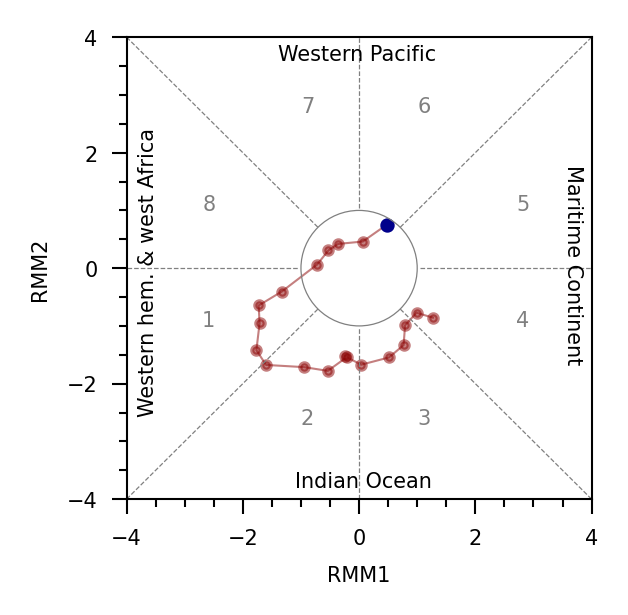

In [18]:
weak_mjo_area = plt.Circle((0, 0), 1., color='gray', lw=0.3,fill=False)

fig, ax = plt.subplots(figsize=(2, 2), dpi=300)

ax.plot(x_plot, y_plot,
        color  = "darkred",
        marker = "o",
        alpha  = 0.5,
        markersize=2,
        linewidth = 0.5,
        zorder = 0,
          )

ax.scatter(x_plot.iloc[0], y_plot.iloc[0], marker='o', s=6 ,color='darkblue',zorder=1)

ax.set(xlim=(-4, 4), xticks=np.arange(-4, 4.1),
       ylim=(-4, 4), yticks=np.arange(-4, 4.1))

#remove grid
ax.grid(False)

#make the design for RMM plot
#draw MJO weak region (circle in the middle with r=1)
ax.add_patch(weak_mjo_area)

#draw line for phase division
#horizontal
ax.axhline(y = 0, xmin=0, xmax=0.37, color = 'gray', linestyle = '--', lw=0.3) 
ax.axhline(y = 0, xmin=1-0.37, xmax=1, color = 'gray', linestyle = '--', lw=0.3) 
#vertical
ax.axvline(x = 0, ymin=1-0.37, ymax=1, color = 'gray', linestyle = '--', lw=0.3) 
ax.axvline(x = 0, ymin=0, ymax=0.37, color = 'gray', linestyle = '--', lw=0.3) 
#diagonal
ax.plot((-4, -0.7), (-4, -0.7), color = 'gray', linestyle = '--', lw=0.3)
ax.plot((4, 0.7), (4, 0.7), color = 'gray', linestyle = '--', lw=0.3)
ax.plot((4, 0.7), (-4, -0.7), color = 'gray', linestyle = '--', lw=0.3)
ax.plot((-4, -0.7), (4, 0.7), color = 'gray', linestyle = '--', lw=0.3)


#SET ticks major interval (2 interval) and minor interval (0.5 interval)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))


plt.xlabel('RMM1', fontsize=5)
plt.ylabel('RMM2', fontsize=5)

plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

#add the geographical location of the MJO convective phases
ax.text(-1.4,3.6,"Western Pacific", size=5)
ax.text(-1.1,-3.8,"Indian Ocean", size=5)
ax.text(-3.8,-2.5,"Western hem. & west Africa", size=5, rotation="vertical")
ax.text(3.5,-1.6,"Maritime Continent", size=5, rotation=270)

#add the phases
ax.text(-2.7,-1 ,"1", size=5,c="gray")
ax.text(-1.,-2.7,"2", size=5,c="gray")
ax.text(1.,-2.7 ,"3", size=5,c="gray")
ax.text(2.7,-1  ,"4", size=5,c="gray")
ax.text(2.7,1   ,"5", size=5,c="gray")
ax.text(1.,2.7  ,"6", size=5,c="gray")
ax.text(-1.,2.7 ,"7", size=5,c="gray")
ax.text(-2.7,1  ,"8", size=5,c="gray")

In [19]:
P = np.arange(0,9)

date_phase = {}
for p in P:
    date_phase["phase-"+str(p)] = rmm_season["yyyymmdd"].loc[rmm_season["phase"]==p]

In [20]:
date_phase

{'phase-0': 2406     1981-01-01
 2407     1981-01-02
 2408     1981-01-03
 2409     1981-01-04
 2410     1981-01-05
             ...    
 16215    2018-10-23
 16216    2018-10-24
 16217    2018-10-25
 16221    2018-10-29
 16222    2018-10-30
 Name: yyyymmdd, Length: 5384, dtype: object,
 'phase-1': 2480     1981-03-16
 2481     1981-03-17
 2482     1981-03-18
 2483     1981-03-19
 2484     1981-03-20
             ...    
 16199    2018-10-07
 16224    2018-11-01
 16225    2018-11-02
 16255    2018-12-02
 16256    2018-12-03
 Name: yyyymmdd, Length: 1123, dtype: object,
 'phase-2': 2486     1981-03-22
 2487     1981-03-23
 2488     1981-03-24
 2489     1981-03-25
 2490     1981-03-26
             ...    
 16228    2018-11-05
 16257    2018-12-04
 16258    2018-12-05
 16259    2018-12-06
 16260    2018-12-07
 Name: yyyymmdd, Length: 1164, dtype: object,
 'phase-3': 2491     1981-03-27
 2492     1981-03-28
 2493     1981-03-29
 2494     1981-03-30
 2495     1981-03-31
             ...    

In [21]:
import xarray as xr

In [22]:
olr = xr.open_dataset("example_data/olr.day.anomalies.1980-2019.nc", engine='netcdf4')
olr_anom = olr["olr_anom"]

olr_anom

<xarray.DataArray 'olr_anom' (time: 14610, lat: 21, lon: 144)>
[44180640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2019-12-31
  * lat      (lat) float32 -25.0 -22.5 -20.0 -17.5 -15.0 ... 17.5 20.0 22.5 25.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  Anomalies: Daily Mean OLR
    units:      W/m^2

In [23]:
date_phase["phase-8"]

2427     1981-01-22
2468     1981-03-04
2469     1981-03-05
2470     1981-03-06
2471     1981-03-07
            ...    
16192    2018-09-30
16223    2018-10-31
16252    2018-11-29
16253    2018-11-30
16254    2018-12-01
Name: yyyymmdd, Length: 959, dtype: object

In [24]:
composites = {}

for p in P:
    date = np.array(date_phase["phase-"+str(p)])
    composites["phase-"+str(p)] = olr_anom.sel(time=date).mean(dim="time")

composites["phase-1"]

<xarray.DataArray 'olr_anom' (lat: 21, lon: 144)>
array([[-0.7180639 , -0.3689086 , -0.4129386 , ..., -0.844656  ,
        -0.7628509 , -0.7455209 ],
       [-0.2926451 , -0.16174881, -0.04362968, ..., -0.73206913,
        -0.29872224, -0.4941546 ],
       [-0.21472088, -0.13801771, -0.41588688, ..., -0.40394536,
        -0.2224432 , -0.18583904],
       ...,
       [-1.0260044 , -2.575701  , -2.5528846 , ...,  0.5678909 ,
         0.04564651, -0.60068136],
       [ 0.755716  , -0.6542204 , -1.180779  , ...,  2.302326  ,
         1.8586652 ,  1.1371201 ],
       [ 1.871869  ,  1.874782  ,  0.86687464, ...,  2.4387488 ,
         2.6318953 ,  2.0984902 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -25.0 -22.5 -20.0 -17.5 -15.0 ... 17.5 20.0 22.5 25.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)


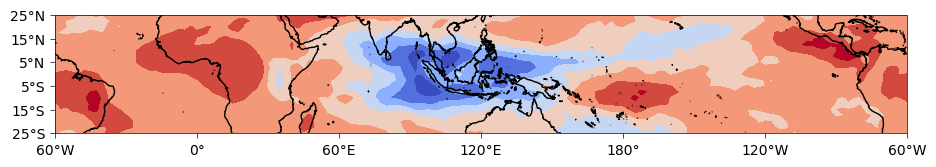

In [25]:

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=120))

# Add cyclic point to data
data=composites["phase-4"]
data, lons = add_cyclic_point(data, coord=data['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, olr_anom['lat'], data,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree(central_longitude=120))
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-25,26,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
# cbar = plt.colorbar(cs)

[-26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8
  10  12  14  16  18  20  22  24  26]


/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/Users/fadhlilrizki/opt/anaconda3/envs/cartopy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarn

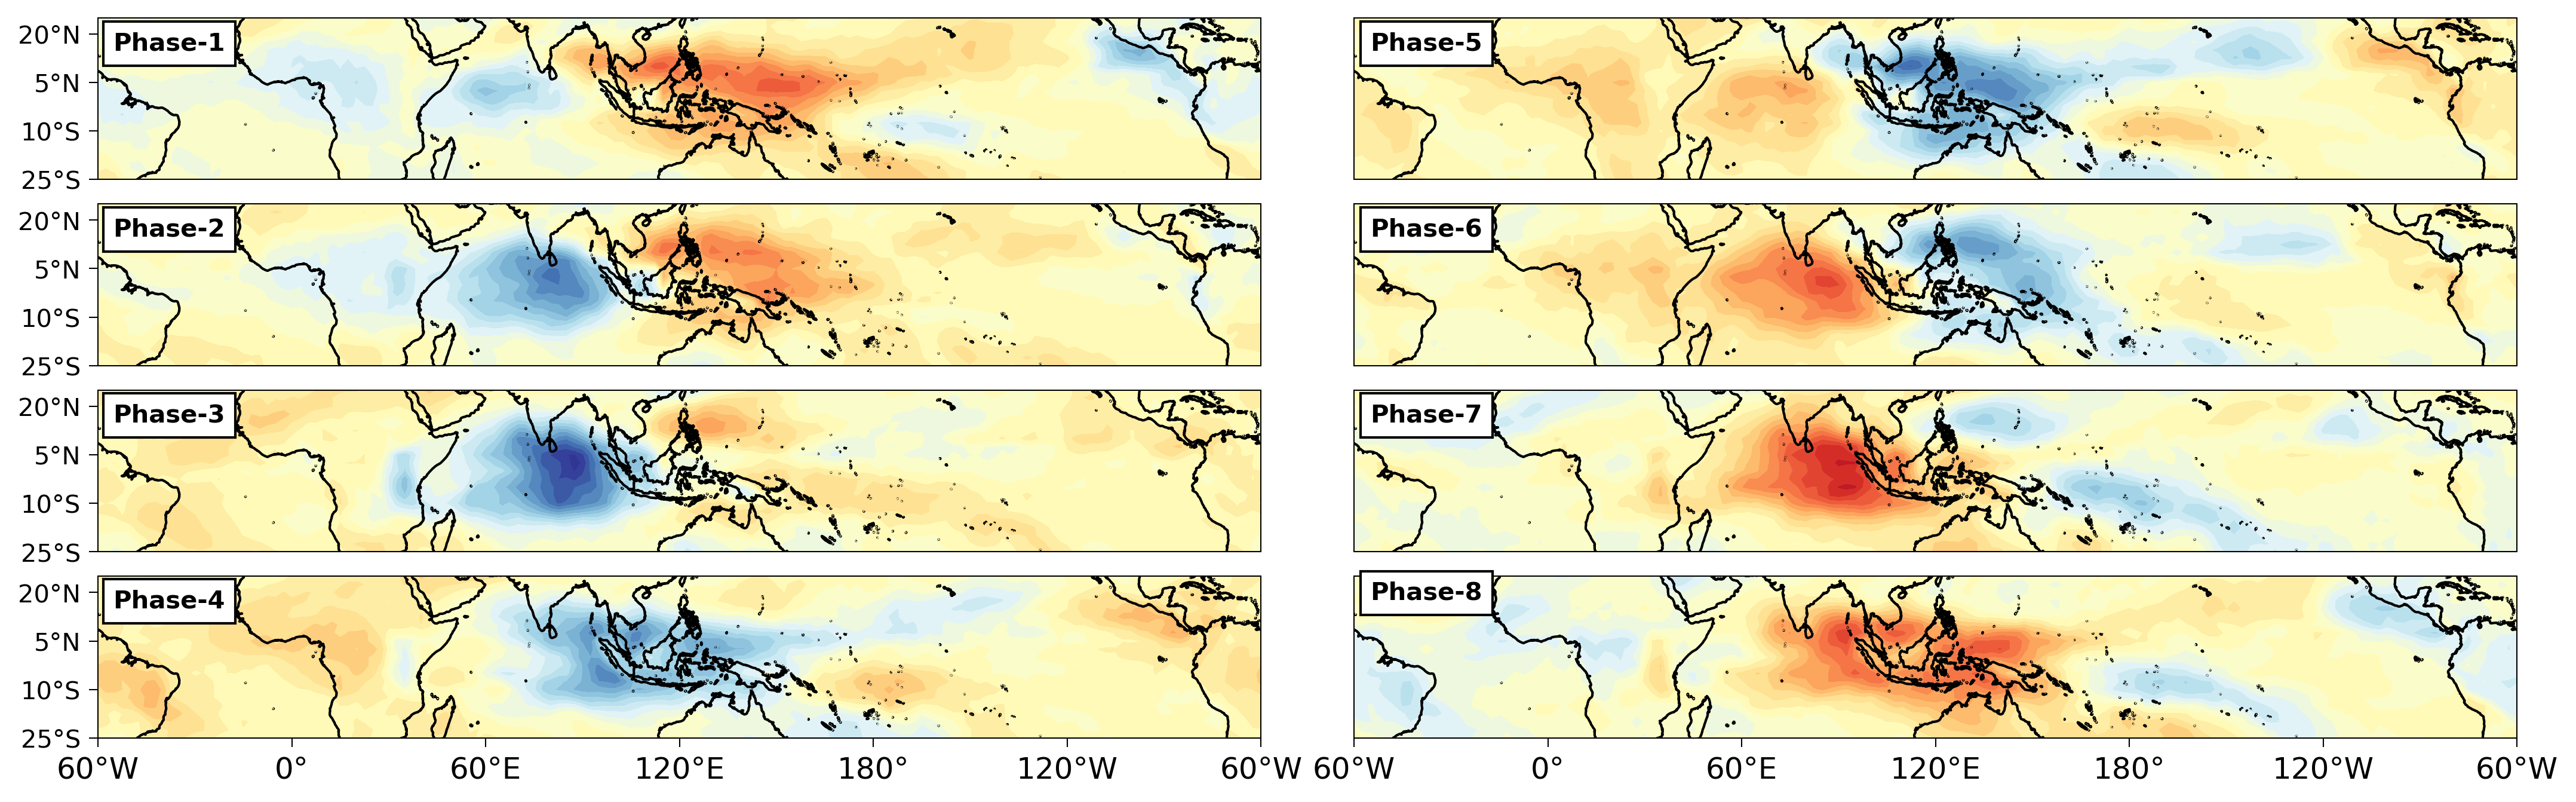

In [87]:

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


# fig,((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(11,8.5))

levels = np.arange(-26,27,2)
print(levels)
fig = plt.figure(figsize=(15, 15), dpi=300)

# Set the axes using the specified map projection
ax1 = fig.add_subplot(4,2,1,projection=ccrs.PlateCarree(central_longitude=120))
ax2 = fig.add_subplot(4,2,3,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax1)
ax3 = fig.add_subplot(4,2,5,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)
ax4 = fig.add_subplot(4,2,7,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)
ax5 = fig.add_subplot(4,2,2,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)
ax6 = fig.add_subplot(4,2,4,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)
ax7 = fig.add_subplot(4,2,6,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)
ax8 = fig.add_subplot(4,2,8,projection=ccrs.PlateCarree(central_longitude=120),sharex=ax2)

# ax1=plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
# ax2=plt.axes(projection=ccrs.PlateCarree(central_longitude=120))

# Add cyclic point to data
data1=composites["phase-1"]
data1, lons = add_cyclic_point(data1, coord=data1['lon'])
data2=composites["phase-2"]
data2, lons = add_cyclic_point(data2, coord=data2['lon'])
data3=composites["phase-3"]
data3, lons = add_cyclic_point(data3, coord=data3['lon'])
data4=composites["phase-4"]
data4, lons = add_cyclic_point(data4, coord=data4['lon'])
data5=composites["phase-5"]
data5, lons = add_cyclic_point(data5, coord=data5['lon'])
data6=composites["phase-6"]
data6, lons = add_cyclic_point(data6, coord=data6['lon'])
data7=composites["phase-7"]
data7, lons = add_cyclic_point(data7, coord=data7['lon'])
data8=composites["phase-8"]
data8, lons = add_cyclic_point(data8, coord=data8['lon'])


# Make a filled contour plot
ax1.contourf(lons, olr_anom['lat'], data1,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax2.contourf(lons, olr_anom['lat'], data2,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax3.contourf(lons, olr_anom['lat'], data3,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax4.contourf(lons, olr_anom['lat'], data4,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax5.contourf(lons, olr_anom['lat'], data5,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax6.contourf(lons, olr_anom['lat'], data6,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax7.contourf(lons, olr_anom['lat'], data7,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)
ax8.contourf(lons, olr_anom['lat'], data8,
            projection = ccrs.PlateCarree(central_longitude=120),
            transform = ccrs.PlateCarree(),cmap='RdYlBu_r',extend='both',levels=levels)

# Add coastlines
ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()
ax5.coastlines()
ax6.coastlines()
ax7.coastlines()
ax8.coastlines()

# Define the xticks for longitude
ax4.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree(central_longitude=120))
ax4.set_xticklabels(np.arange(-180,181,60),fontsize=12)  
ax8.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree(central_longitude=120))
ax8.set_xticklabels(np.arange(-180,181,60), fontsize=12)  

lon_formatter = cticker.LongitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax8.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax1.set_yticks(np.arange(-25,26,15), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(-25,26,15), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(-25,26,15), crs=ccrs.PlateCarree())
ax4.set_yticks(np.arange(-25,26,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax1.yaxis.set_major_formatter(lat_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
# cbar = plt.colorbar(cs)
plt.subplots_adjust(left=0.,
                    bottom=0., 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.08, 
                    hspace=-0.9)

ax1.text(0.013, 0.8, 'Phase-1', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax2.text(0.013, -0.35, 'Phase-2', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax3.text(0.013, -1.5, 'Phase-3', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax4.text(0.013, -2.65, 'Phase-4', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax5.text(1.094, 0.8, 'Phase-5', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax6.text(1.094, -0.35, 'Phase-6', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax7.text(1.094, -1.5, 'Phase-7', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))
ax8.text(1.094, -2.6, 'Phase-8', transform=ax1.transAxes, 
            size=10, weight='bold').set_bbox(dict(facecolor='w', alpha=1.0, edgecolor='k'))


plt.show()